## Cezanne and Picasso

All data below is from ChatGPT. Inspired by Galenson's work on artistic life cycles.  

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
# picasso 

picasso_str = """
    "The Old Guitarist" (1903) - Age 22
    "Family of Saltimbanques" (1905) - Age 24
    "Les Demoiselles d'Avignon" (1907) - Age 26
    "Girl Before a Mirror" (1932) - Age 51
    "Guernica" (1937) - Age 56
    "The Weeping Woman" (1937) - Age 56
    "Massacre in Korea" (1951) - Age 70
    "Les Femmes d'Alger" (1955) - Age 74
    "The Three Dancers" (1925) - Age 44
    "Le Rêve" (1932) - Age 51
    "Science and Charity" (1897) - Age 16
    "The Absinthe Drinker" (1901) - Age 20
    "La Vie" (1903) - Age 22
    "Boy with a Pipe" (1905) - Age 24
    "Portrait of Gertrude Stein" (1906) - Age 25
    "Self Portrait" (1907) - Age 26
    "Bread and Fruit Dish on a Table" (1909) - Age 28
    "Girl with a Mandolin" (1910) - Age 29
    "Accordionist" (1911) - Age 30
    "Violin and Candlestick" (1910) - Age 29
    "Ma Jolie" (1911-1912) - Age 30-31
    "The Blue Room" (1901) - Age 20
    "The Soup" (1902) - Age 21
    "La Gommeuse" (1901) - Age 20
    "Woman Ironing" (1904) - Age 23
    "The Actor" (1904) - Age 23
    "Lady with a Fan" (1905) - Age 24
    "Garçon à la pipe" (1905) - Age 24
    "At the Lapin Agile" (1905) - Age 24
    "Portrait of Ambroise Vollard" (1910) - Age 29
    "Portrait of Daniel-Henry Kahnweiler" (1910) - Age 29
    "Still Life with Chair Caning" (1912) - Age 31
    "Sitzende Frau" (1917) - Age 36
    "Three Women at the Spring" (1921) - Age 40
    "The Pipes of Pan" (1923) - Age 42
    "Two Women Running on the Beach" (1922) - Age 41
    "Paul as Harlequin" (1924) - Age 43
    "Three Musicians" (1921) - Age 40
    "The Dance" (1925) - Age 44
    "The Kiss" (1925) - Age 44
    "Woman in a Red Armchair" (1929) - Age 48
    "Nude, Green Leaves and Bust" (1932) - Age 51
    "Nude in a Black Armchair" (1932) - Age 51
    "The Dream and Lie of Franco" (1937) - Age 56
    "Night Fishing at Antibes" (1939) - Age 58
    "Dora Maar au Chat" (1941) - Age 60
    "The Charnel House" (1944-1945) - Age 63-64
    "Françoise Gilot" (1946) - Age 65
    "The Painter and His Model" (1963) - Age 82
    "Self-Portrait Facing Death" (1972) - Age 91
"""

In [4]:
cezanne_str = """
    "House of the Hanged Man" (1873) - Age 34
    "A Modern Olympia" (1873-1874) - Age 34-35
    "The Black Marble Clock" (1869-1871) - Age 30-32
    "The Bathers" (small) (1874-1875) - Age 35-36
    "Mont Sainte-Victoire" (1885-1887) - Age 46-48
    "Still Life with Soup Tureen" (1877) - Age 38
    "Boy in a Red Vest" (1888-1890) - Age 49-51
    "The Basket of Apples" (1893) - Age 54
    "The Card Players" (1890-1895) - Age 51-56
    "Still Life with Cherries and Peaches" (1885-1887) - Age 46-48
    "L'Estaque, Melting Snow" (1871) - Age 32
    "Pyramid of Skulls" (1901) - Age 62
    "Turn in the Road" (1881) - Age 42
    "Still Life with Apples" (1893-1894) - Age 54-55
    "The Bay of Marseilles, Seen from L'Estaque" (1885) - Age 46
    "Portrait of Uncle Dominique" (1866) - Age 27
    "Château Noir" (1900-1904) - Age 61-65
    "The Large Bathers" (1898-1905) - Age 59-66
    "Madame Cézanne in a Red Armchair" (1877) - Age 38
    "Mont Sainte-Victoire Seen from Bellevue" (1890-1895) - Age 51-56
    "The Great Pine" (1895-1897) - Age 56-58
    "Still Life with Plaster Cupid" (1895) - Age 56
    "The House with the Cracked Walls" (1892-1894) - Age 53-55
    "The Red Rock" (1895-1900) - Age 56-61
    "Madame Cézanne in a Yellow Chair" (1888-1890) - Age 49-51
    "The Smoker" (1890-1892) - Age 51-53
    "The Gardener Vallier" (1902-1906) - Age 63-67
    "Jas de Bouffan" (1874) - Age 35
    "The Eternal Feminine" (1877) - Age 38
    "Self-Portrait" (1875) - Age 36
    "Still Life with Curtain and Flowered Pitcher" (1895) - Age 56
    "The Pond" (1877-1879) - Age 38-40
    "Portrait of Victor Chocquet" (1877) - Age 38
    "Bathers" (1874-1875) - Age 35-36
    "The Sea at L'Estaque behind Trees" (1878-1879) - Age 39-40
    "Chestnut Trees at Jas de Bouffan" (1885-1887) - Age 46-48
    "Mont Sainte-Victoire and the Viaduct of the Arc River Valley" (1885) - Age 46
    "The Green Apple" (1873) - Age 34
    "Still Life with a Ginger Jar and Eggplants" (1893-1894) - Age 54-55
    "The Blue Vase" (1889-1890) - Age 50-51
    "Sugar Bowl, Pears, and Blue Cup" (1865-1877) - Age 26-38
    "The Overture to Tannhauser" (1869) - Age 30
    "The Negro Scipio" (1867) - Age 28
    "The Hanged Man's House" (1873) - Age 34
    "The Gulf of Marseilles Seen from L'Estaque" (1885) - Age 46
    "View of Auvers-sur-Oise" (1873-1875) - Age 34-36
    "The Bibémus Quarry" (1898-1900) - Age 59-61
    "Curtain, Jug, and Fruit Bowl" (1893-1894) - Age 54-55
    "The Bridge at Maincy" (1879-1880) - Age 40-41
    "Landscape with Watermill" (1890-1892) - Age 51-53
"""

In [7]:
combined = picasso_str.strip() + "\n" + cezanne_str.strip()
df = pd.DataFrame()

cols = ['age', 'year', 'artist']
for line in combined.splitlines():
        
    artist = 'Picasso' if line in picasso_str else 'Cezanne'
    name = line.split("\"")[1]
    year = line.split(")")[0][-4:]
    age = line[-2:]
    df.loc[name, cols] = [age, year, artist]

In [9]:
df.to_csv("picasso_and_cezanne.csv")

In [8]:
p = df.query("artist=='Picasso'").age.astype(int)
c = df.query("artist=='Cezanne'").age.astype(int)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


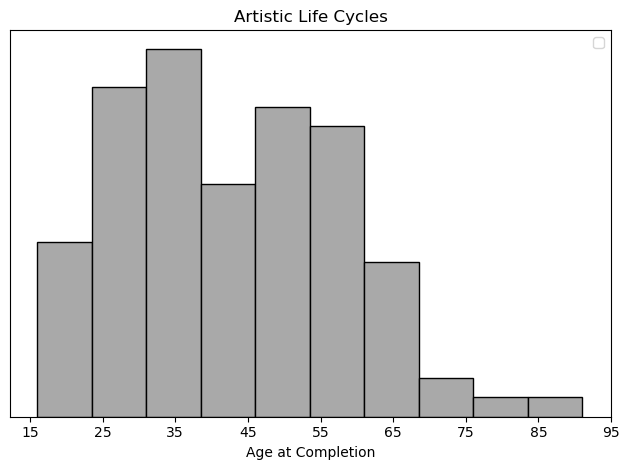

In [17]:
bins = range(15, 101, 10)
plt.hist(df.age.astype(int),
        fc = 'darkgray',
        ec = 'black')
plt.xticks(bins)
plt.yticks([])

plt.xlabel("Age at Completion")
plt.legend()
plt.title("Artistic Life Cycles")
plt.tight_layout()
plt.savefig("../../book/images/picasso_and_cezanne_combined.svg", format = 'svg', transparent = True)
plt.show()

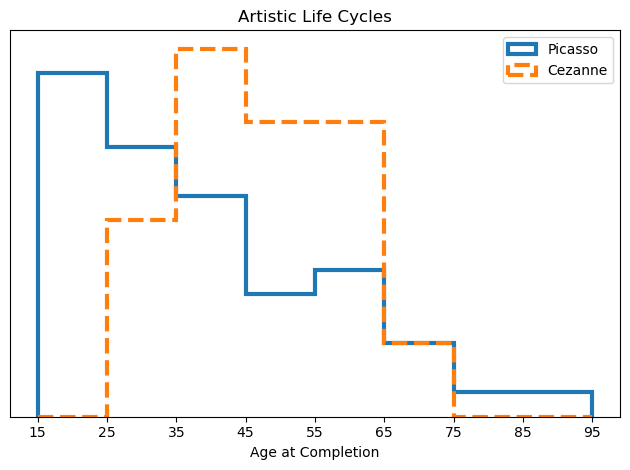

In [18]:
bins = range(15, 101, 10)
plt.hist(p, #[p,c],
        bins = bins,
        density = True,
        histtype = 'step',
        lw = 3,
        ls = 'solid',
        label = 'Picasso')
plt.hist(c, #[p,c],
        bins = bins,
        density = True,
        histtype = 'step',
        lw = 3,
        ls = 'dashed',
        label = 'Cezanne')
plt.xticks(bins)
plt.yticks([])

plt.xlabel("Age at Completion")
plt.legend()
plt.title("Artistic Life Cycles")
plt.tight_layout()
plt.savefig("../../book/images/picasso_and_cezanne.svg", format = 'svg', transparent = True)
plt.show()